In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
zip_path = '/content/gdrive/My Drive/Data.zip'
!unzip '$zip_path' 
!unzip -q '/content/SIMS dataset/images.zip' 
!unzip -q '/content/SIMS dataset/Annotations_in_3_formats.zip' 

Archive:  /content/gdrive/My Drive/Data.zip
  inflating: SIMS dataset/test.txt   
  inflating: SIMS dataset/validation.txt  
  inflating: SIMS dataset/training.txt  
  inflating: SIMS dataset/Assignment-2_modified scope.pdf  
  inflating: SIMS dataset/Annotations_in_3_formats.zip  
  inflating: SIMS dataset/images.zip  


In [0]:
%cp -R "/content/annotations/pascal_voc/Annotations/."  "/content/images"


In [4]:
!ls /content/images

0001.jpg  0626.jpg  1251.jpg  1876.jpg	2501.jpg  3126.jpg  3751.jpg  4376.jpg
0001.txt  0626.txt  1251.txt  1876.txt	2501.txt  3126.txt  3751.txt  4376.txt
0001.xml  0626.xml  1251.xml  1876.xml	2501.xml  3126.xml  3751.xml  4376.xml
0002.jpg  0627.jpg  1252.jpg  1877.jpg	2502.jpg  3127.jpg  3752.jpg  4377.jpg
0002.txt  0627.txt  1252.txt  1877.txt	2502.txt  3127.txt  3752.txt  4377.txt
0002.xml  0627.xml  1252.xml  1877.xml	2502.xml  3127.xml  3752.xml  4377.xml
0003.jpg  0628.jpg  1253.jpg  1878.jpg	2503.jpg  3128.jpg  3753.jpg  4378.jpg
0003.txt  0628.txt  1253.txt  1878.txt	2503.txt  3128.txt  3753.txt  4378.txt
0003.xml  0628.xml  1253.xml  1878.xml	2503.xml  3128.xml  3753.xml  4378.xml
0004.jpg  0629.jpg  1254.jpg  1879.jpg	2504.jpg  3129.jpg  3754.jpg  4379.jpg
0004.txt  0629.txt  1254.txt  1879.txt	2504.txt  3129.txt  3754.txt  4379.txt
0004.xml  0629.xml  1254.xml  1879.xml	2504.xml  3129.xml  3754.xml  4379.xml
0005.jpg  0630.jpg  1255.jpg  1880.jpg	2505.jpg  3130.jpg  3755.

In [0]:
!mkdir Dataset
!mkdir Dataset/train
!mkdir Dataset/train/images
!mkdir Dataset/train/annotations
!mkdir Dataset/valid
!mkdir Dataset/valid/images
!mkdir Dataset/valid/annotations
!mkdir Dataset/test
!mkdir Dataset/test/images
!mkdir Dataset/test/annotations

In [5]:
import shutil
import os
#copy files based on {datasets in txt}

def copy(filepath,dest_dir):
    with open(filepath) as fp:
        for line in fp:
            os.makedirs(dest_dir, exist_ok=True)  # succeeds even if directory exists.
            shutil.copy(line.replace('\n', ''), dest_dir+"/images") #image
            shutil.copy(line.replace('.jpg\n', '.xml'), dest_dir+"/annotations") ##label

#copy files based on {datasets in txt}
copy('/content/SIMS dataset/training.txt','Dataset/train/')
copy('/content/SIMS dataset/validation.txt','Dataset/valid/')
copy('/content/SIMS dataset/test.txt','Dataset/test/')

#from preprocessing.pascal_voc_to_csv import xml_to_csv

import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path,image_path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        #print(xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text
            
            size = root.find('size') #contains height and width of image
            w = int(size.find('width').text)
            h = int(size.find('height').text)
            
            # truncate any bb coordinates that fall outside of the image
            xmin = max(0, xmin)
            ymin = max(0, ymin)
            xmax = min(w, xmax)
            ymax = min(h, ymax)
            
            # # ignore the bounding boxes where the minimum values are larger
            # # than the maximum values and vice-versa due to annotation errors
            if xmin >= xmax or ymin >= ymax:
                continue
            elif xmax <= xmin or ymax <= ymin:
                continue
            
            file_path = image_path+root.find('filename').text+".jpg"
            value = (file_path,
                     xmin,
                     ymin,
                     xmax,
                     ymax,
                     label,
                     )
            xml_list.append(value)
    column_name = ['filename','xmin', 'ymin', 'xmax', 'ymax','class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    root_path = "Dataset/"
    datasets = ['train','test','valid']
    for ds in datasets:
        #image_path = os.path.join(os.getcwd(), root_path+ds, 'annotations')
        image_path = os.path.join(root_path+ds, 'annotations/')
        print(image_path)
        update_path = os.path.join(root_path+ds, 'images/')
        xml_df = xml_to_csv(image_path,update_path)
        xml_df.to_csv('labels_{}.csv'.format(ds), index=None, header=False)
        print('Successfully converted xml to csv.')


main()

Dataset/train/annotations/
Successfully converted xml to csv.
Dataset/test/annotations/
Successfully converted xml to csv.
Dataset/valid/annotations/
Successfully converted xml to csv.


In [6]:
!git clone https://github.com/fizyr/keras-retinanet 

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.


In [7]:
!pip install ./keras-retinanet/

Processing ./keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170131 sha256=9edbd46c461027470caad95e7574238d93d098370957900c101b334992b9bc46
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=b2bd12c7dd060ca31daef06d32a9deb9c21d13eadf1e4b500ea2c264ec42a574
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [8]:
!python /content/keras-retinanet/setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
creating keras_retinanet
creating keras_retinanet/utils
error: /content/keras_retinanet/utils/compute_overlap.pyx


In [0]:
!mv "/content/Dataset"  "/content/keras-retinanet"

In [0]:
%cp -R "/content/gdrive/My Drive/folder/classes.csv"  "/content/keras-retinanet"
%cp -R "/content/gdrive/My Drive/folder/labels_test.csv"  "/content/keras-retinanet"
%cp -R "/content/gdrive/My Drive/folder/labels_train.csv"  "/content/keras-retinanet"
%cp -R "/content/gdrive/My Drive/folder/labels_valid.csv"  "/content/keras-retinanet"

In [11]:
!cd "/content/keras-retinanet/keras_retinanet/bin" && retinanet-train  --freeze-backbone --backbone resnet50 --no-resize --compute-val-loss --random-transform --batch-size 8 --steps 70 --epochs 50 --multiprocessing --compute-val-loss  --weighted-average --snapshot-path "/content/gdrive/My Drive/ratina_weights"  csv /content/keras-retinanet/labels_train.csv /content/keras-retinanet/classes.csv


Using TensorFlow backend.
2020-05-15 16:00:51.724622: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
102948864/102945312 [==============================] - 9s 0us/step
Creating model, this may take a second...
2020-05-15 16:01:05.115727: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-15 16:01:05.175597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-15 16:01:05.176363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-15 16:01:05.176440: I tensorflow/stream_executor/platform/default/dso_loa

In [13]:
!cd "/content/keras-retinanet/keras_retinanet/bin" && retinanet-convert-model "/content/gdrive/My Drive/ratina_weights/resnet50_csv_50.h5" /content/m_i.h5

Using TensorFlow backend.
2020-05-15 18:33:25.181961: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-15 18:33:27.109669: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-15 18:33:27.169709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-15 18:33:27.170535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-15 18:33:27.170596: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-15 18:33:27.209816: I tensorflow/str

In [14]:
!cd "/content/keras-retinanet/keras_retinanet/bin" && retinanet-evaluate csv /content/keras-retinanet/labels_test.csv /content/keras-retinanet/classes.csv /content/m_i.h5

Using TensorFlow backend.
2020-05-15 18:34:22.648886: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading model, this may take a second...
2020-05-15 18:34:26.147415: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-15 18:34:26.171045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-15 18:34:26.172023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-15 18:34:26.172085: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
202

In [0]:
class_mapping = ['Car', 'Truck', 'Van', 'LongVehicle', 'Bus', 
                'Airliner', 'Propeller Aircraft', 'Trainer Aircraft', 'Chartered Aircraft',
                'Fighter Aircraft', 'Others', 'Stair Truck', 'Pushback Truck',
                'Helicopter', 'Boat']
class_mapping = dict(enumerate(class_mapping))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
      

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


processing time:  2.789389133453369


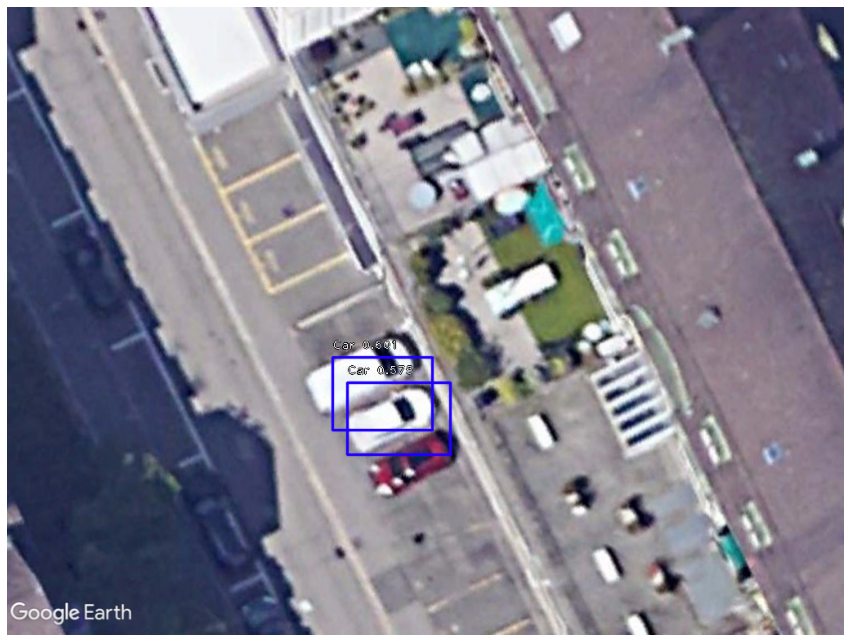

In [19]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
labels_to_names=class_mapping
model_path = os.path.join('m_i.h5')
model_ = models.load_model(model_path, backbone_name='resnet50')
# load image
image = read_image_bgr('/content/keras-retinanet/Dataset/test/images/2011.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model_.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()